<a href="https://colab.research.google.com/github/Jonathans0ramirez/HousePricePrediction/blob/master/Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# TRAIN_URL = "https://www.kaggle.com/c/5407/download/train.csv"
# TEST_URL = "https://www.kaggle.com/c/5407/download/test.csv"
# DESC_URL = "https://www.kaggle.com/c/5407/download/data_description.txt"

## IMPORTS

In [0]:
import numpy as np
import pandas as pd
import datetime
import random

In [3]:
# Plots
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Scipy
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [0]:
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [0]:
# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [0]:
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
# pd.options.display.max_seq_items = 8000
# pd.options.display.max_rows = 8000

In [8]:
# Datasets

train = pd.read_csv("train.csv") #1872-2010
# -----------------------------------------------------------------------------
test = pd.read_csv("test.csv")
# -----------------------------------------------------------------------------
train.shape, test.shape

((1460, 81), (1459, 80))

## Pre-análisis

In [9]:
# The data
train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
186    187          80       RL          NaN     9947   Pave   NaN      IR1   
1347  1348          20       RL         93.0    15306   Pave   NaN      IR1   
484    485          20       RL          NaN     7758   Pave   NaN      IR1   
210    211          30       RL         67.0     5604   Pave   NaN      Reg   
1323  1324          30       RL         50.0     5330   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
186          Lvl    AllPub   CulDSac       Gtl      Mitchel       Norm   
1347         HLS    AllPub    Corner       Gtl       Timber       Norm   
484          Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
210          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1323         HLS    AllPub    Inside       Gtl      BrkSide       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
186        Norm     1Fam       SLvl            7            5       1990   
1347       Norm     1Fam     1Story            8            5       2006   
484        Norm     1Fam     1Story            5            7       1962   
210        Norm     1Fam     1Story            5            6       1925   
1323       Norm     1Fam     1Story            4            7       1940   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
186           1991     Gable  CompShg     HdBoard     HdBoard       None   
1347          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
484           2001     Gable  CompShg     HdBoard     Plywood       None   
210           1950     Gable  CompShg      Stucco      Stucco       None   
1323          1950       Hip  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
186          0.0        TA        TA      PConc       Gd       TA   
1347       100.0        Gd        TA      PConc       Ex       TA   
484          0.0        TA        Gd     CBlock       TA       TA   
210          0.0        TA        TA     CBlock       TA       TA   
1323         0.0        Fa        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
186            Av          GLQ         611          Unf           0   
1347           Gd          GLQ          80          Unf           0   
484            No          ALQ         588          Unf           0   
210            No          Rec         468          Unf           0   
1323           No          LwQ         280          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
186         577         1188    GasA        Ex          Y      SBrkr   
1347       1652         1732    GasA        Ex          Y      SBrkr   
484         411          999    GasA        Gd          Y      SBrkr   
210         396          864    GasA        TA          N      FuseA   
1323        140          420    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
186       1217         0             0       1217             1             0   
1347      1776         0             0       1776             1             0   
484        999         0             0        999             1             0   
210        864         0             0        864             1             0   
1323       708         0             0        708             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
186          2         0             3             1          Gd   
1347         2         0             3             1          Gd   
484          1         0             3             1          Gd   
210          1         0             2             1          TA   
1323         1         0             2             1          Fa   

   

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Differentiate numerical features (minus the target) and categorical features
# Categorical features
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
# Numerical features
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<blockquote><p>Esto quiere decir que el precio medio está alrededor de 180k USD, la casa más costosa es de 775k USD y la más económica 43,9k USD</p></blockquote>

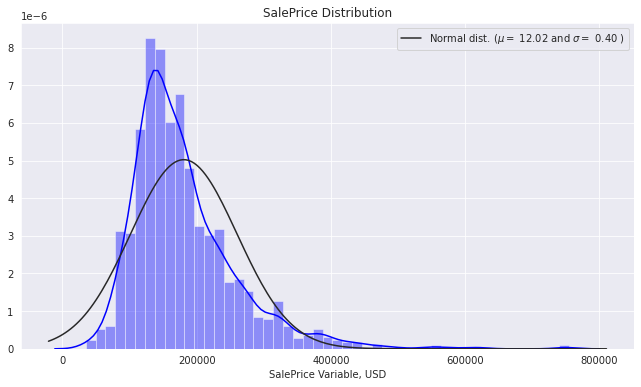

In [14]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['SalePrice'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(np.log1p(train["SalePrice"]))
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

![Skewness](https://www.oreilly.com/library/view/clojure-for-data/9781784397180/graphics/7180OS_01_180.jpg)

<blockquote>
  <p>El precio de venta está sesgado a la derecha. Esto es un problema porque la mayoría de los modelos de ML no funcionan bien con datos no distribuidos normalmente. Podemos aplicar una transformación de log(1 + x) para corregir el sesgo.</p>
</blockquote>

In [0]:
# Applying log transformation
train['SalePrice'] = np.log1p(train['SalePrice'])

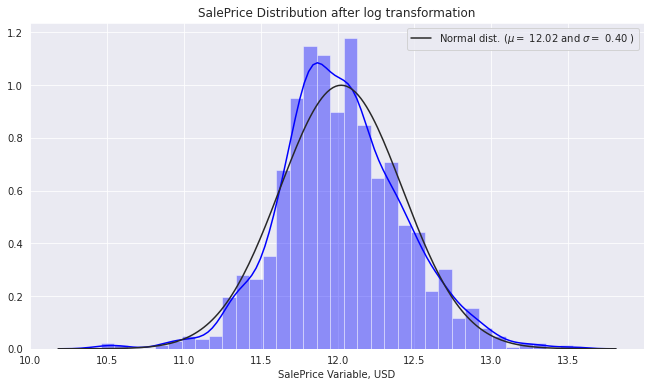


Mu: 12.024057394918406 Sigma: 0.39931245219387496


In [16]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['SalePrice'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["SalePrice"])
plt.title("SalePrice Distribution after log transformation")
plt.xlabel("SalePrice Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

In [17]:
len(train.query('SalePrice > 500000'))

0

<blockquote><p>Solo 9 tienen un precio mayor a 50K USD por lo que se podrían descartar como Outliers.<p></blockquote>

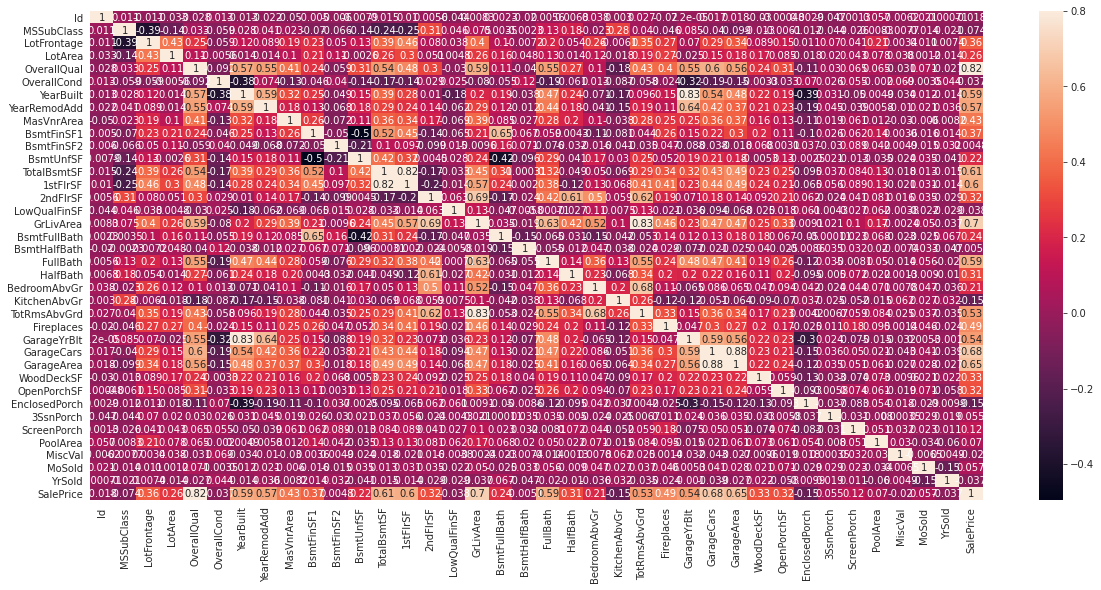

In [18]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

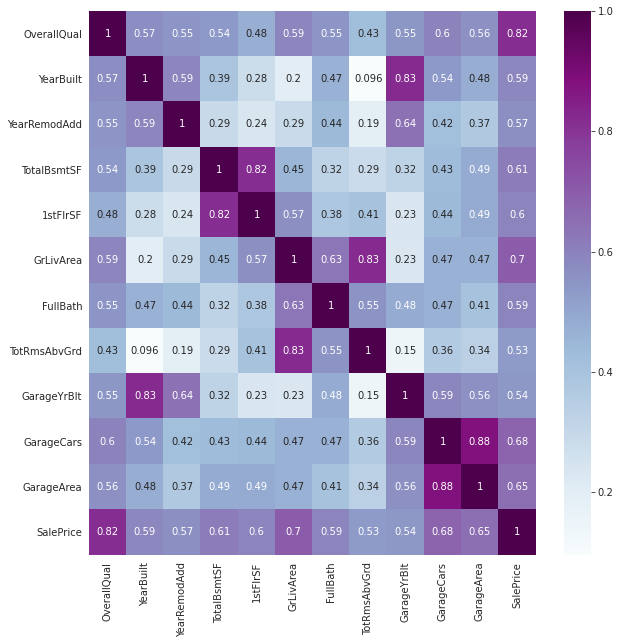

In [19]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True, cmap="BuPu")


<blockquote><h5>Algunas variables están correlacionadas entre sí</h5></blockquote>

#### _Descubrimientos_

* 'OverallQual', 'GrLivArea' y 'TotalBsmtSF' están estrechamente relacionadas con 'SalePrice'
* 'GarageCars' y 'GarageArea' también son variables candidatas. Sin embargo, consideramos que el número de carros puede verse reflejado en el área del garage. Son como gemelos, no se pueden distinguir. Es por ello, que solo necesitamos una de estas para nuestro análisis, y nos quedaremos con 'GarageCars' por ser la más correlacionada con 'SalePrice'.
* TotalBsmtSF' y '1stFloor' también son caracteristicas similares. En este caso conservamos 'TotalBsmtSF'.



### Scatter Plots

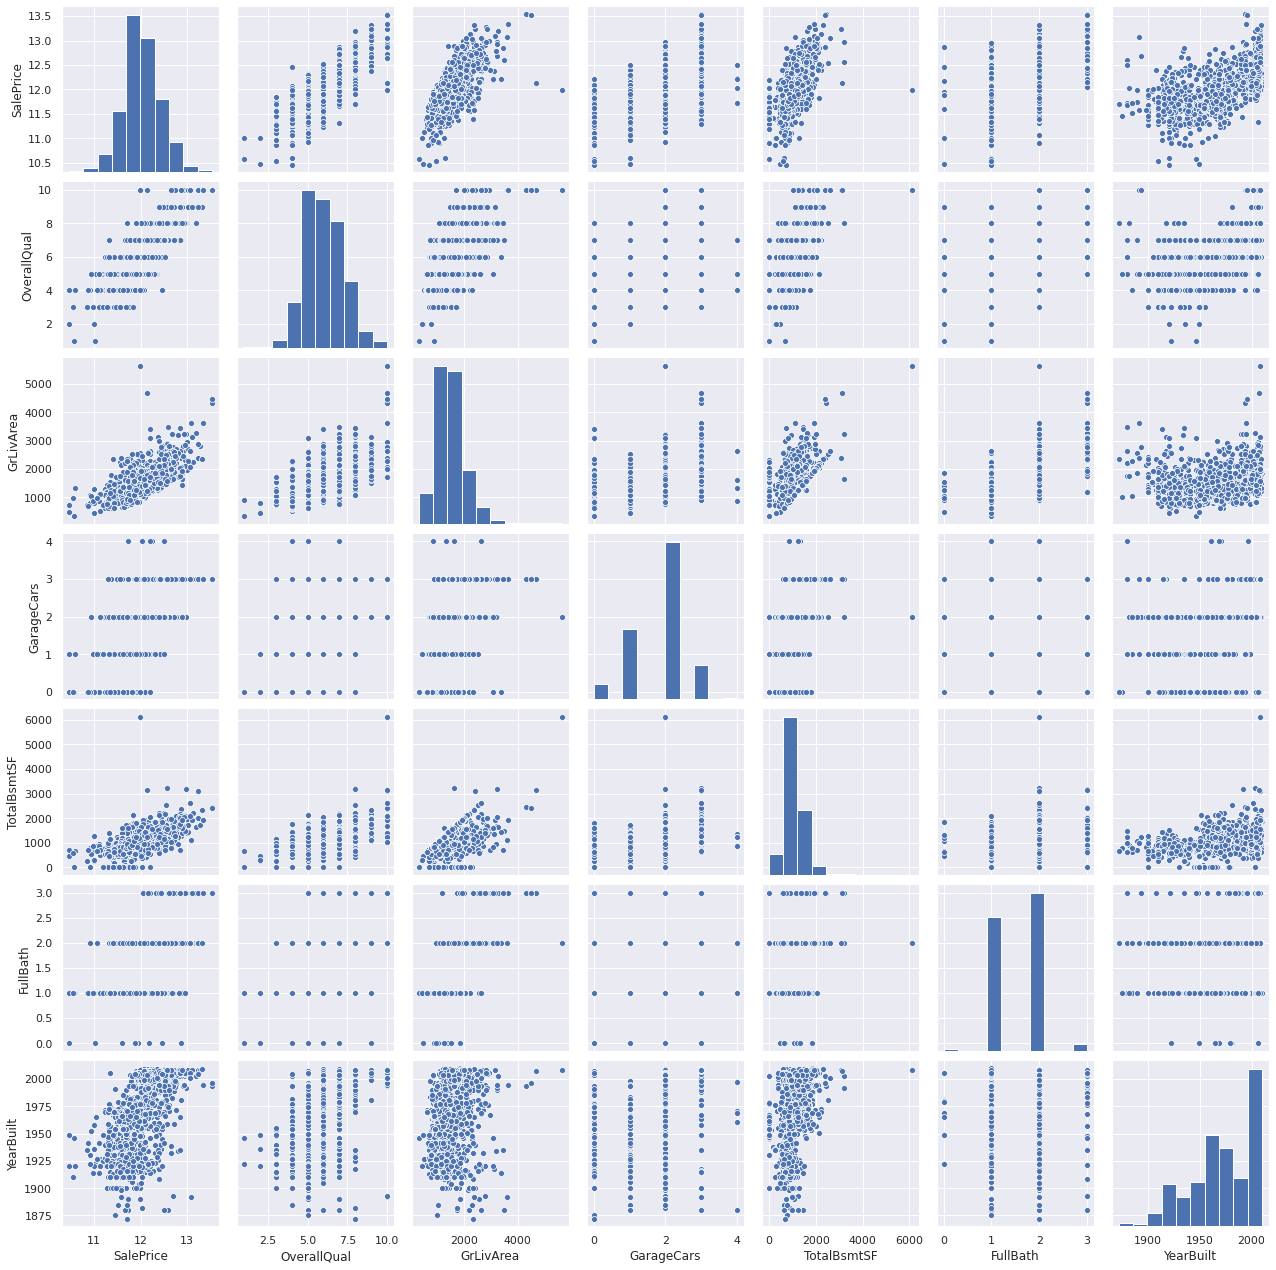

In [20]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

<blockquote><p>
  Estas figuras nos dan un acercamiento sobre lo relacionadas que se encuentran las variables.
</p></blockquote>

<blockquote><p>
  Por ejemplo en la gráfica 'TotalBsmtSF' vs 'GrLivArea' podemos observar que la mayoría de los puntos se ven limitados por una línea, y esto se debe a que la área del sotano por lo general no son mayores que el terreno disponible (a excepción de los bunkers).
</p></blockquote>

<blockquote><p>
  Por ejemplo en la gráfica 'TotalBsmtSF' vs 'GrLivArea' podemos observar que la mayoría de los puntos se ven limitados por una línea, y esto se debe a que la área del sotano por lo general no son mayores que el terreno disponible (a excepción de los bunkers).
</p></blockquote>

<blockquote><p>
  Otra observación está entre 'YearBuilt' vs 'SalePrice', los precios parecen estables, sin embargo a lo largo de los años su comportamiento parece ser exponencial.
</p></blockquote>

In [21]:
# Remove the Ids from train and test. (not useful for the model)
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
numerical_features = numerical_features.drop(['Id'], 1)
train.shape, test.shape

((1460, 80), (1459, 79))

## Missing Values (MV)

Se deben rellenar todos los missing values para permitirle a nuestro modelo funcionar correctamente.

Reemplazar los missing values por 0, injustificadamente, empeora la precisión del modelo. Es por ello que se decide reemplazarlo con valores de las muestras más cercanas correspondientes a la variable.

In [22]:
len(train), len(test)

(1460, 1459)

[Text(0, 0.5, 'Percent of missing values')]

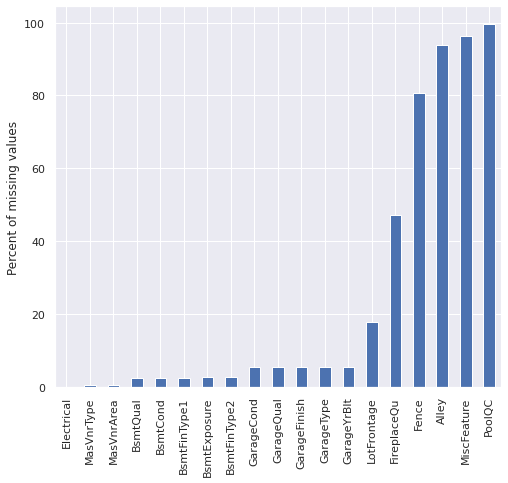

In [23]:
# Missing values plot
f, ax = plt.subplots(figsize=(8, 7))
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
ax.set(ylabel="Percent of missing values")

In [24]:
#Percent of missing values in train dataset

trainMV = train.isna().mean().round(4)* 100
trainMV.sort_values(ascending=False).head(20) 

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageFinish     5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
RoofMatl         0.00
dtype: float64

<blockquote>
  <p>
    Cuatro features (PoolQC, MiscFeature, Type of alley access and Fence quality) tienen más del 80% de missing values. Lo que indica que estas features no afectan directamente el precio de venta final y se podrían descartar de ambos datasets
  </p>
</blockquote>

In [25]:
#Percent of missing values in test dataset

testMV = test.isna().mean().round(4) * 100
testMV.sort_values(ascending=False).head(20)

PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageCond       5.35
GarageFinish     5.35
GarageYrBlt      5.35
GarageQual       5.35
GarageType       5.21
BsmtCond         3.08
BsmtExposure     3.02
BsmtQual         3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
BsmtHalfBath     0.14
dtype: float64

In [0]:
# Deleting features from both dataset
train_labels = train['SalePrice'].reset_index(drop=True)

train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 1)
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], 1)

<blockquote><p>
  Lo mejor será combinar ambos dataset para trabajar mejor los Missing Values
</p></blockquote>

In [27]:
mixed = pd.concat([train] + [test]).reset_index(drop=True)

# Data view
mixed.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
418           50       RL         60.0     8160   Pave      Reg         Lvl   
1068         160       RM         42.0     3964   Pave      Reg         Lvl   
306           60       RL        116.0    13474   Pave      Reg         Lvl   
815           20       RL         48.0    12137   Pave      IR2         Lvl   
1562          20       RL         65.0     7832   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
418     AllPub    Inside       Gtl      Edwards       Norm       Norm   
1068    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
306     AllPub    Inside       Gtl      SawyerW      Feedr       Norm   
815     AllPub   CulDSac       Gtl      CollgCr       Norm       Norm   
1562    AllPub    Inside       Gtl       Sawyer       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
418      1Fam     1.5Fin            5            6       1940          1950   
1068   TwnhsE     2Story            6            4       1973          1973   
306      1Fam     2Story            7            5       1990          1991   
815      1Fam     1Story            7            5       1998          1998   
1562     1Fam     1Story            5            5       1968          1968   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
418      Gable  CompShg     MetalSd     MetalSd       None         0.0   
1068     Gable  CompShg     CemntBd     CmentBd       None         0.0   
306      Gable  CompShg     HdBoard     Plywood    BrkFace       246.0   
815      Gable  CompShg     VinylSd     VinylSd    BrkFace       442.0   
1562       Hip  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
418         TA        TA     BrkTil       TA       TA           No   
1068        TA        TA     CBlock       Gd       TA           No   
306         Gd        TA     CBlock       Gd       TA           No   
815         TA        TA      PConc       Gd       TA           No   
1562        TA        TA     CBlock       TA       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
418           ALQ       312.0          Unf         0.0      444.0   
1068          ALQ       837.0          Unf         0.0      105.0   
306           ALQ       700.0          Unf         0.0        0.0   
815           Unf         0.0          Unf         0.0     1649.0   
1562          GLQ       775.0          Unf         0.0       89.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
418         756.0    GasA        Fa          N      FuseF       756       378   
1068        942.0    GasA        Gd          Y      SBrkr      1291      1230   
306         700.0    GasA        Gd          Y      SBrkr      1122      1121   
815        1649.0    GasA        Ex          Y      SBrkr      1661         0   
1562        864.0    GasA        Ex          Y      SBrkr       864         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
418              0       1134           1.0           0.0         1         1   
1068             0       2521           1.0           0.0         2         1   
306              0       2243           1.0           0.0         2         1   
815              0       1661           0.0           0.0         2         0   
1562             0        864           1.0           0.0         1         0   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
418              3             1          TA             7        Typ   
1068             5             1          TA            10       Maj1   
306              4             1          Gd             8        Typ   
815              3             1          Gd             6        Typ 

In [28]:
# Look the entire MV

temp = mixed.isna().sum().sort_values()
temp[temp>=1]

KitchenQual        1
GarageCars         1
Electrical         1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
GarageArea         1
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageQual       159
LotFrontage      486
FireplaceQu     1420
SalePrice       1459
dtype: int64

<blockquote><p>
  Primero trabajaremos sobre las características categoricas de la siguiente manera.
</p></blockquote>

In [29]:
mixed['FireplaceQu'] = mixed['FireplaceQu'].fillna('None')
mixed['GarageQual'] = mixed['GarageQual'].fillna('None')
mixed['GarageFinish'] = mixed['GarageFinish'].fillna('None')
mixed['GarageCond'] = mixed['GarageCond'].fillna('None')
mixed['GarageType'] = mixed['GarageType'].fillna('None')
mixed['BsmtExposure'] = mixed['BsmtExposure'].fillna('None')
mixed['BsmtQual'] = mixed['BsmtQual'].fillna('None')
mixed['BsmtCond'] = mixed['BsmtCond'].fillna('None')
mixed['BsmtFinType2'] = mixed['BsmtFinType2'].fillna('None')
mixed['BsmtFinType1'] = mixed['BsmtFinType1'].fillna('None')
mixed['MasVnrType'] = mixed['MasVnrType'].fillna('None')
mixed['BsmtFinType2'] = mixed['BsmtFinType2'].fillna('None')

# Look again
mixed.isna().sum().sort_values(ascending=False).head(20)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
BsmtFinSF1         1
SaleType           1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
Electrical         1
dtype: int64

### LotFrontage: Linear feet of street connected to property.

<blockquote>
  <p>Verificamos la correlación con 'LotArea' (Lot size in square feet).</p></blockquote>

             LotFrontage   LotArea
LotFrontage     1.000000  0.489896
LotArea         0.489896  1.000000


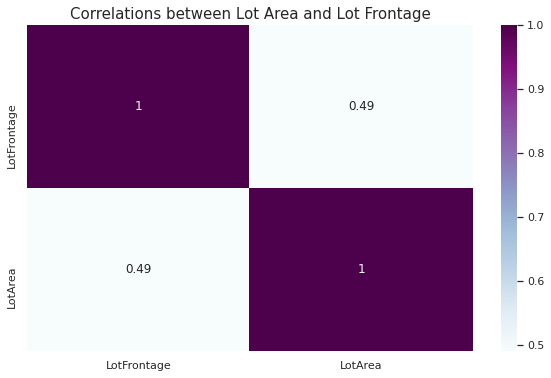

In [30]:
temp = mixed[['LotFrontage','LotArea']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['LotFrontage'], y=temp['LotArea'])
plt.title('Correlations between Lot Area and Lot Frontage', size=15);

g = sns.heatmap(temp.corr(),annot=True, cmap="BuPu")

print(temp.corr())

<blockquote><p>
  Rellenaremos los MV de 'LotFrontage' con la raíz cuadrada de 'LotArea'.
</p></blockquote>

In [0]:
mixed['LotFrontage'] = mixed['LotFrontage'].fillna(np.sqrt(mixed['LotArea']))

             LotFrontage   LotArea
LotFrontage     1.000000  0.626687
LotArea         0.626687  1.000000


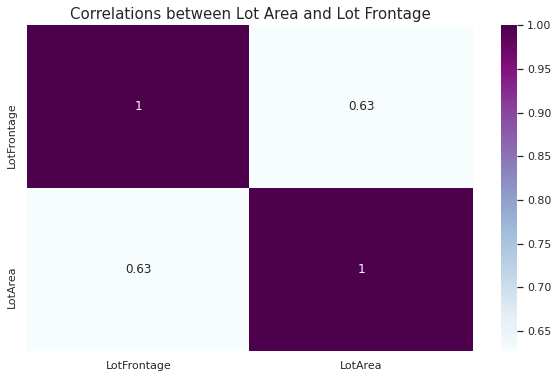

In [32]:
temp = mixed[['LotFrontage','LotArea']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['LotFrontage'], y=temp['LotArea'])
plt.title('Correlations between Lot Area and Lot Frontage', size=15);

g = sns.heatmap(temp.corr(),annot=True, cmap="BuPu")

print(temp.corr())

### GarageYrBlt: Year garage was built.

<blockquote>
  <p>Buscamos una relación con 'YearBuilt'</p></blockquote>

In [33]:
temp_year = mixed[['GarageYrBlt', 'YearBuilt']]

temp_year

GarageYrBlt  YearBuilt
0          2003.0       2003
1          1976.0       1976
2          2001.0       2001
3          1998.0       1915
4          2000.0       2000
...           ...        ...
2914          NaN       1970
2915       1970.0       1970
2916       1960.0       1960
2917          NaN       1992
2918       1993.0       1993

[2919 rows x 2 columns]

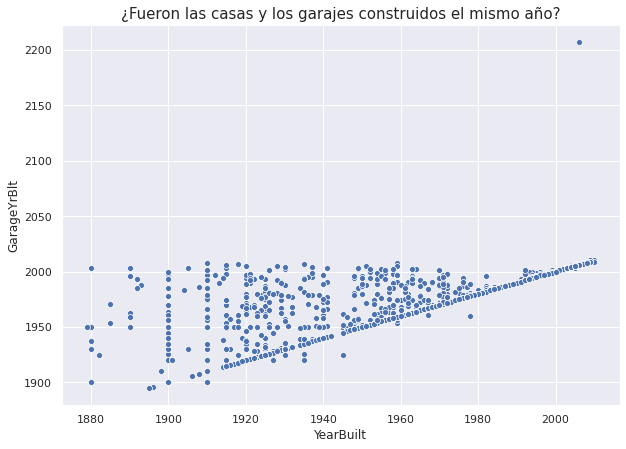

In [34]:
plt.figure(figsize=(10,7))
sns.scatterplot(temp_year['YearBuilt'], temp_year['GarageYrBlt'])
plt.title('¿Fueron las casas y los garajes construidos el mismo año?', size=15);

In [35]:
mixed.query('GarageYrBlt>2100')['GarageYrBlt']

2592    2207.0
Name: GarageYrBlt, dtype: float64

<blockquote>
  <h4>Análisis</h4>
</blockquote>

<ul>
  <li>Algunos garajes se construyeron tiempo después de la casa.</li>
  <li>Después de 1980 casi todas las casas fueron construidas con garaje.</li>
  <li>Para el año 2207 se piensa construir un garaje.</li>
</ul>

<blockquote>
  <p>El dato más alejado es un dato atípico entonces lo desconsideramos.</p>
</blockquote>

In [0]:
mixed.loc[mixed['GarageYrBlt'] == 2207,'GarageYrBlt'] = 2007

<blockquote>
  <p>Finalmente rellenamos los MV de 'GarageYrBlt con 'YearBuilt'.</p>
</blockquote>

In [0]:
mixed['GarageYrBlt'] = mixed['GarageYrBlt'].fillna(mixed['YearBuilt'])

### GarageArea: Size of garage in square feet.
### GarageCars: Size of garage in car capacity.

<blockquote>
  <p>Llenamos el MV en GarageArea con su mediana luego de ordenar los datos.</p>
</blockquote>

In [0]:
# Group for better management.
mixed['GarageArea'] = mixed.groupby('GarageType')['GarageArea'].transform(lambda x: x.fillna(value=x.median()))

<blockquote>
  <p>Se encontró una relación entre 'GarageArea' y 'GarageCars'. Entonces se comprueba.</p>
</blockquote>

            GarageCars  GarageArea
GarageCars      1.0000      0.8897
GarageArea      0.8897      1.0000


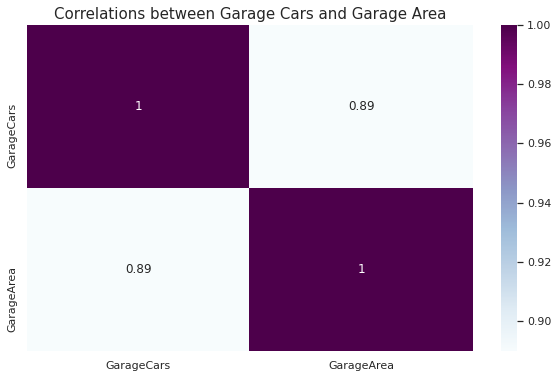

In [39]:
mixed['GarageCars'].corr(mixed['GarageArea'])

temp = mixed[['GarageCars','GarageArea']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['GarageCars'], y=temp['GarageArea'])
plt.title('Correlations between Garage Cars and Garage Area', size=15);

g = sns.heatmap(temp.corr(),annot=True, cmap="BuPu")

print(temp.corr())

In [40]:
mixed.loc[mixed['GarageCars'].isna()]['GarageArea']

2576    399.5
Name: GarageArea, dtype: float64

<blockquote>
  <p>Nos fijamos en el 'GarageArea' por su estrecha relación con 'GarageCars' y llegamos a la conclusión que aproximadamente 400 sq ft.</p>
</blockquote>

<blockquote>
  <p>Es por ello que miraremos cuál es la capacidad de coches para 400 sq ft.</p>
</blockquote>

In [41]:
mixed.loc[mixed['GarageArea'] == 400]['GarageCars'].value_counts()

2.0    57
1.0     1
Name: GarageCars, dtype: int64

<blockquote>
  <p>2 coches.</p>
</blockquote>

In [0]:
mixed['GarageCars'] = mixed['GarageCars'].fillna(2)

### MasVnrArea: Masonry veneer area in square feet.

<blockquote>
  <p>Vamos a mirar por qué estos datos están vacíos.</p>
</blockquote>

In [43]:
mixed.loc[mixed['MasVnrArea'].isna()][['MasVnrArea', 'MasVnrType']]

MasVnrArea MasVnrType
234          NaN       None
529          NaN       None
650          NaN       None
936          NaN       None
973          NaN       None
977          NaN       None
1243         NaN       None
1278         NaN       None
1691         NaN       None
1706         NaN       None
1882         NaN       None
1992         NaN       None
2004         NaN       None
2041         NaN       None
2311         NaN       None
2325         NaN       None
2340         NaN       None
2349         NaN       None
2368         NaN       None
2592         NaN       None
2657         NaN       None
2686         NaN       None
2862         NaN       None

In [0]:
mixed['MasVnrArea'] = mixed['MasVnrArea'].fillna(0)

### MSZoning: Identifies the general zoning classification of the sale.

<blockquote>
  <p>Buscando relaciones y patrones.</p>
</blockquote>

In [45]:
mixed.loc[mixed['MSZoning'].isna()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1915          30      NaN   109.000000    21780   Grvl      Reg         Lvl   
2216          20      NaN    80.000000    14584   Pave      Reg         Low   
2250          70      NaN   237.907545    56600   Pave      IR1         Low   
2904          20      NaN   125.000000    31250   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1915       NaN    Inside       Gtl       IDOTRR       Norm       Norm   
2216    AllPub    Inside       Mod       IDOTRR       Norm       Norm   
2250    AllPub    Inside       Gtl       IDOTRR       Norm       Norm   
2904    AllPub    Inside       Gtl      Mitchel     Artery       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1915     1Fam     1Story            2            4       1910          1950   
2216     1Fam     1Story            1            5       1952          1952   
2250     1Fam     2.5Unf            5            1       1900          1950   
2904     1Fam     1Story            1            3       1951          1951   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1915     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0   
2216     Gable  CompShg     AsbShng     VinylSd       None         0.0   
2250       Hip  CompShg     Wd Sdng     Wd Sdng       None         0.0   
2904     Gable  CompShg      CBlock     VinylSd       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1915        Fa        Fa     CBlock     None     None         None   
2216        Fa        Po       Slab     None     None         None   
2250        TA        TA     BrkTil       TA       TA           No   
2904        TA        Fa     CBlock     None     None         None   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1915         None         0.0         None         0.0        0.0   
2216         None         0.0         None         0.0        0.0   
2250          Unf         0.0          Unf         0.0      686.0   
2904         None         0.0         None         0.0        0.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1915          0.0    GasA        TA          N      FuseA       810         0   
2216          0.0    Wall        Po          N      FuseA       733         0   
2250        686.0    GasA        Ex          Y      SBrkr      1150       686   
2904          0.0    GasA        TA          Y      FuseA      1600         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1915             0        810           0.0           0.0         1         0   
2216             0        733           0.0           0.0         1         0   
2250             0       1836           0.0           0.0         2         0   
2904             0       1600           0.0           0.0         1         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1915             1             1          TA             4       Min1   
2216             2             1          Fa             4        NaN   
2250             4             1          TA             7       Maj1   
2904             3             1          TA             6        Mod   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
1915           0        None     Detchd       1975.0          Unf         1.0   
2216           0        None     Attchd       1952.0          Unf         2.0   
2250           0        None     Detchd       1900.0          Unf         1.0   
2904           0        None     Attchd       1951.0          Unf         1.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
1915       280.0         TA         TA          N         119           24   
2216       487.0         Fa         Po  

In [46]:
mixed['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

<blockquote>
  <p>Se decidió rellenar estos MV con RL al ser el dominante.</p>
</blockquote>

In [0]:
mixed['MSZoning'] = mixed['MSZoning'].fillna(value='RL')

### Utilities

<blockquote>
  <p>Observemos 'YearBuilt' para estos MV.</p>
</blockquote>

In [48]:
mixed.loc[mixed['Utilities'].isna()]['YearBuilt'] 

1915    1910
1945    1952
Name: YearBuilt, dtype: int64

In [49]:
# Utilities in 1910
mixed.loc[mixed['YearBuilt'] == 1910]['Utilities'].value_counts()

AllPub    42
Name: Utilities, dtype: int64

In [50]:
# Utilities in 1952
mixed.loc[mixed['YearBuilt'] == 1952]['Utilities'].value_counts()

AllPub    17
Name: Utilities, dtype: int64

<blockquote>
  <p>Ambas tienen como tipo 'AllPub'.</p>
</blockquote>

In [0]:
mixed['Utilities'] = mixed['Utilities'].fillna(value='AllPub')

### BsmtFullBath: Basement full bathrooms
### BsmtHalfBath: Basement half bathrooms

In [52]:
mixed['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [53]:
mixed['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [54]:
mixed.query('BsmtHalfBath=="nan" or BsmtFullBath=="nan"')[['BsmtHalfBath', 'BsmtFullBath', 'YearBuilt']]

BsmtHalfBath  BsmtFullBath  YearBuilt
2120           NaN           NaN       1946
2188           NaN           NaN       1959

In [55]:
mixed.query('YearBuilt == 1959')['BsmtHalfBath'].value_counts()

0.0    39
1.0     3
Name: BsmtHalfBath, dtype: int64

In [56]:
mixed.query('YearBuilt == 1946')['BsmtHalfBath'].value_counts()

0.0    12
1.0     2
Name: BsmtHalfBath, dtype: int64

<blockquote>
  <p>Supondremos que no hay baños en estos años.</p>
</blockquote>

In [0]:
mixed['BsmtHalfBath'] = mixed['BsmtHalfBath'].fillna(0)

In [0]:
mixed['BsmtFullBath'] = mixed['BsmtFullBath'].fillna(0)

### Functional: Home functionality (Assume typical unless deductions are warranted)

<blockquote>
  <p>Simplemente llenaremos los MV con la moda como se hizo en puntos anteriores.</p>
</blockquote>

In [59]:
mixed['Functional'].mode()[0]

'Typ'

In [0]:
mixed['Functional'] = mixed['Functional'].fillna(mixed['Functional'].mode()[0])

### BsmtFinSF1: Type 1 finished square feet.
### BsmtFinSF2: Type 2 finished square feet.
### TotalBsmtSF: Total square feet of basement area

<blockquote>
  <h3>Para el caso de 'BsmtFinSF1'.</h3>
  <p>Podemos usar tanto su correlación con BsmtFullBath como la moda. Así.</p>
</blockquote>

              BsmtFinSF1  BsmtFullBath
BsmtFinSF1      1.000000      0.638943
BsmtFullBath    0.638943      1.000000


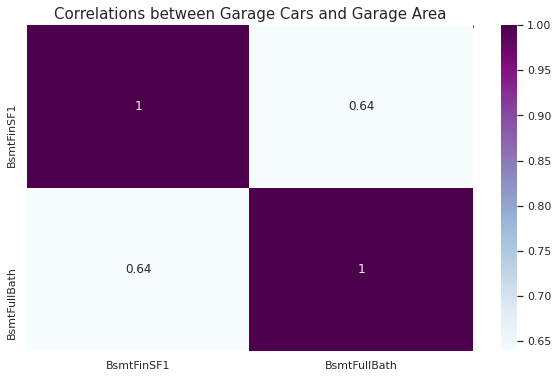

In [61]:
mixed['BsmtFinSF1'].corr(mixed['BsmtFullBath'])

temp = mixed[['BsmtFinSF1','BsmtFullBath']]

plt.figure(figsize=(10,6))
sns.scatterplot(x=temp['BsmtFinSF1'], y=temp['BsmtFullBath'])
plt.title('Correlations between Garage Cars and Garage Area', size=15);

g = sns.heatmap(temp.corr(),annot=True, cmap="BuPu")

print(temp.corr())

In [62]:
mixed.loc[mixed['BsmtFinSF1'].isna()]['BsmtFullBath']

2120    0.0
Name: BsmtFullBath, dtype: float64

In [63]:
mixed['BsmtFinSF1'].mode()[0]

0.0

In [0]:
mixed['BsmtFinSF1'] = mixed['BsmtFinSF1'].fillna(0)

<blockquote>
  <p>De forma similar se podría hacer con BsmtFinSF2, o mediante la correlación entre BsmtFinType_</p>
</blockquote>

In [65]:
mixed.loc[mixed['BsmtFinSF2'].isna()]['BsmtFinType2']

2120    None
Name: BsmtFinType2, dtype: object

<blockquote>
  <p>Observamos que no hay un tipo asignado para estos.</p>
</blockquote>

In [0]:
mixed['BsmtFinSF2'] = mixed['BsmtFinSF2'].fillna(0)

<blockquote>
  <h3>Para 'TotalBsmtSF'.</h3>
</blockquote>

In [67]:
mixed['TotalBsmtSF'].mode()[0]

0.0

In [68]:
mixed['BsmtUnfSF'].mode()[0]

0.0

In [0]:
mixed[['TotalBsmtSF','BsmtUnfSF']] = mixed[['TotalBsmtSF','BsmtUnfSF']].fillna(0)

### SaleType: Type of sale

<blockquote><p>¿Cuántos faltan?</p></blockquote>

In [70]:
mixed.isna().sum().sort_values(ascending=False).head(7)

SalePrice      1459
SaleType          1
Exterior1st       1
Electrical        1
KitchenQual       1
Exterior2nd       1
ExterCond         0
dtype: int64

In [71]:
mixed['SaleType'].mode()[0]

'WD'

In [0]:
mixed['SaleType'] = mixed['SaleType'].fillna(mixed['SaleType'].mode()[0])

### Exterior1st: Exterior covering on house
### Exterior2nd: Exterior covering on house (if more than one material)

<blockquote>
  <p>En este caso podríamos observar el año en el que fueron tomados estos datos y verificar cuál fue el material más popular para este año.</p>
</blockquote>

In [73]:
mixed.loc[mixed['Exterior1st'].isna()][['Exterior1st', 'Exterior2nd', 'YearBuilt']]

Exterior1st Exterior2nd  YearBuilt
2151         NaN         NaN       1940

In [74]:
mixed.loc[mixed['YearBuilt'] == 1940]['Exterior1st'].value_counts()

Wd Sdng    13
MetalSd    11
VinylSd     9
WdShing     1
Stucco      1
Name: Exterior1st, dtype: int64

In [75]:
mixed.loc[mixed['YearBuilt'] == 1940]['Exterior2nd'].value_counts()

MetalSd    12
Wd Sdng    10
VinylSd     9
Wd Shng     1
Stucco      1
Plywood     1
HdBoard     1
Name: Exterior2nd, dtype: int64

<blockquote>
  <p>Podemos concluir que ambos materiales exteriores son similares. Woord y Metal fueron los más comunes</p>
</blockquote>

<blockquote>
  <p>Usaremos MetalSd para rellenar los MV</p>
</blockquote>

In [0]:
mixed[['Exterior1st','Exterior2nd']] = mixed[['Exterior1st','Exterior2nd']].fillna('MetalSd')

### Electrical: Electrical system

In [77]:
mixed.loc[mixed['Electrical'].isna()]['YearBuilt']

1379    2006
Name: YearBuilt, dtype: int64

In [78]:
mixed.loc[mixed['YearBuilt'] == 2006]['Electrical'].value_counts()

SBrkr    137
Name: Electrical, dtype: int64

In [0]:
mixed['Electrical'] = mixed['Electrical'].fillna(value='SBrkr')

### KitchenQual: Kitchen quality

<blockquote>
  <p>Usaremos 'OverallCond' para determinar la calidad de la cocina.</p>
</blockquote>

In [80]:
mixed.loc[mixed['KitchenQual'].isna()]['YearBuilt']

1555    1917
Name: YearBuilt, dtype: int64

In [81]:
mixed.loc[mixed['YearBuilt']==1917][['KitchenQual', 'OverallCond']]

KitchenQual  OverallCond
1248          TA            5
1555         NaN            3
1818          Ex            7

In [82]:
mixed.loc[mixed['OverallCond']==3]['KitchenQual'].value_counts()

TA    40
Fa     6
Gd     3
Name: KitchenQual, dtype: int64

In [0]:
mixed['KitchenQual'] = mixed['KitchenQual'].fillna(value='TA')

### After Missing Values

In [84]:
mixed.isna().sum().sort_values()

MSSubClass         0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
                ... 
Exterior2nd        0
Exterior1st        0
RoofMatl           0
Foundation         0
SalePrice       1459
Length: 76, dtype: int64

## Outliers

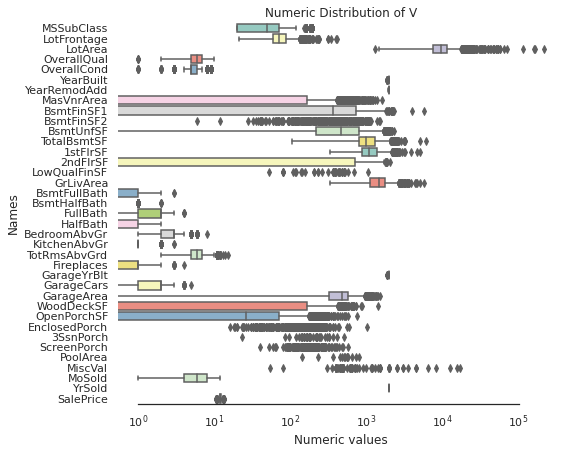

In [85]:
# VALORES ATIPICOS

sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=mixed[numerical_features] , orient="h", palette="Set3")
ax.xaxis.grid(False)
ax.set(ylabel="Names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of V")
sns.despine(trim=True, left=True)

In [86]:
# Find skewed numerical features
skew_features = mixed[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(26)

There are 26 numerical features with Skew > 0.5 :


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
LotFrontage       2.331216
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
dtype: float64

<blockquote>
  <p>Utilizamos la función scipy boxcox1p que calcula la transformación Box-Cox. El objetivo es encontrar una transformación simple que nos permita normalizar los datos</p>
</blockquote>

In [0]:
# Normalize skewed features
for i in skew_index:
    mixed[i] = boxcox1p(mixed[i], boxcox_normmax(mixed[i] + 1))

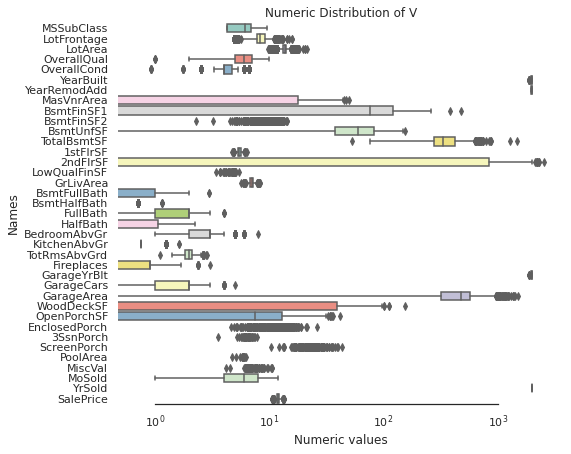

In [88]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=mixed[numerical_features] , orient="h", palette="Set3")
ax.xaxis.grid(False)
ax.set(ylabel="Names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of V")
sns.despine(trim=True, left=True)

### Split DataSet

In [0]:
mixed = pd.get_dummies(mixed, drop_first=True)

In [0]:
mixed = mixed.loc[:,~mixed.columns.duplicated()]

In [91]:
X = mixed.iloc[:len(train_labels), :]
X_test = mixed.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1460, 247), (1460,), (1459, 247))

In [92]:
X

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
0       6.502440     8.017557  13.424520            7     3.989638       2003   
1       4.250991     8.705587  13.694527            6     5.996435       1976   
2       6.502440     8.163536  14.034133            7     3.989638       2001   
3       6.865584     7.763298  13.683421            7     3.989638       1915   
4       6.502440     8.873393  14.550142            8     3.989638       2000   
...          ...          ...        ...          ...          ...        ...   
1455    6.502440     7.866734  13.287740            6     3.989638       1999   
1456    4.250991     8.914456  14.376783            6     4.677073       1978   
1457    6.865584     8.066736  13.567456            7     6.633459       1941   
1458    4.250991     8.163536  13.720309            5     4.677073       1950   
1459    4.250991     8.487249  13.768025            5     4.677073       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003   19.378557  117.855863    0.000000  30.016555   
1             1976    0.000000  146.805798    0.000000  44.178889   
2             2002   17.721069   91.575284    0.000000  56.957796   
3             1970    0.000000   52.776367    0.000000  64.881737   
4             2000   25.323127  112.040325    0.000000  61.233859   
...            ...         ...         ...         ...        ...   
1455          2000    0.000000    0.000000    0.000000  90.873275   
1456          1988   15.304344  127.139205    8.043576  68.321834   
1457          2006    0.000000   62.223004    0.000000  86.514310   
1458          1996    0.000000   18.884676   13.081223   0.000000   
1459          1965    0.000000  131.443563    9.453392  28.272608   

      TotalBsmtSF  1stFlrSF     2ndFlrSF  LowQualFinSF  GrLivArea  \
0      296.832338  5.318379  1019.540733           0.0   7.234115   
1      407.302427  5.550627     0.000000           0.0   6.947212   
2      314.805067  5.362015  1034.306417           0.0   7.275132   
3      268.234296  5.388291   899.200533           0.0   7.237969   
4      376.259375  5.493032  1265.167706           0.0   7.470741   
...           ...       ...          ...           ...        ...   
1455   323.980298  5.383260   823.310079           0.0   7.198698   
1456   479.524026  5.838137     0.000000           0.0   7.415593   
1457   378.132796  5.514904  1387.914627           0.0   7.529679   
1458   358.217385  5.457132     0.000000           0.0   6.798144   
1459   405.723971  5.547815     0.000000           0.0   6.942706   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0         0.992784       0.00000         2  1.069352             3   
1         0.000000       0.71081         2  0.000000             3   
2         0.992784       0.00000         2  1.069352             3   
3         0.992784       0.00000         1  0.000000             3   
4         0.992784       0.00000         2  1.069352             4   
...            ...           ...       ...       ...           ...   
1455      0.000000       0.00000         2  1.069352             3   
1456      0.992784       0.00000         2  0.000000             3   
1457      0.000000       0.00000         2  0.000000             4   
1458      0.992784       0.00000         1  0.000000             2   
1459      0.992784       0.00000         1  1.069352             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0          0.75096      2.238463    0.000000       2003.0         2.0   
1          0.75096      1.978208    0.900816       1976.0         2.0   
2          0.75096      1.978208    0.900816       2001.0         2.0   
3          0.75096      2.116352    0.900816       1998.0         3.0   
4          0.75096      2.347900    0.900816       2000.0         3.0   
...            ...           ...         ...          ...         ...   
1455       0.75096     

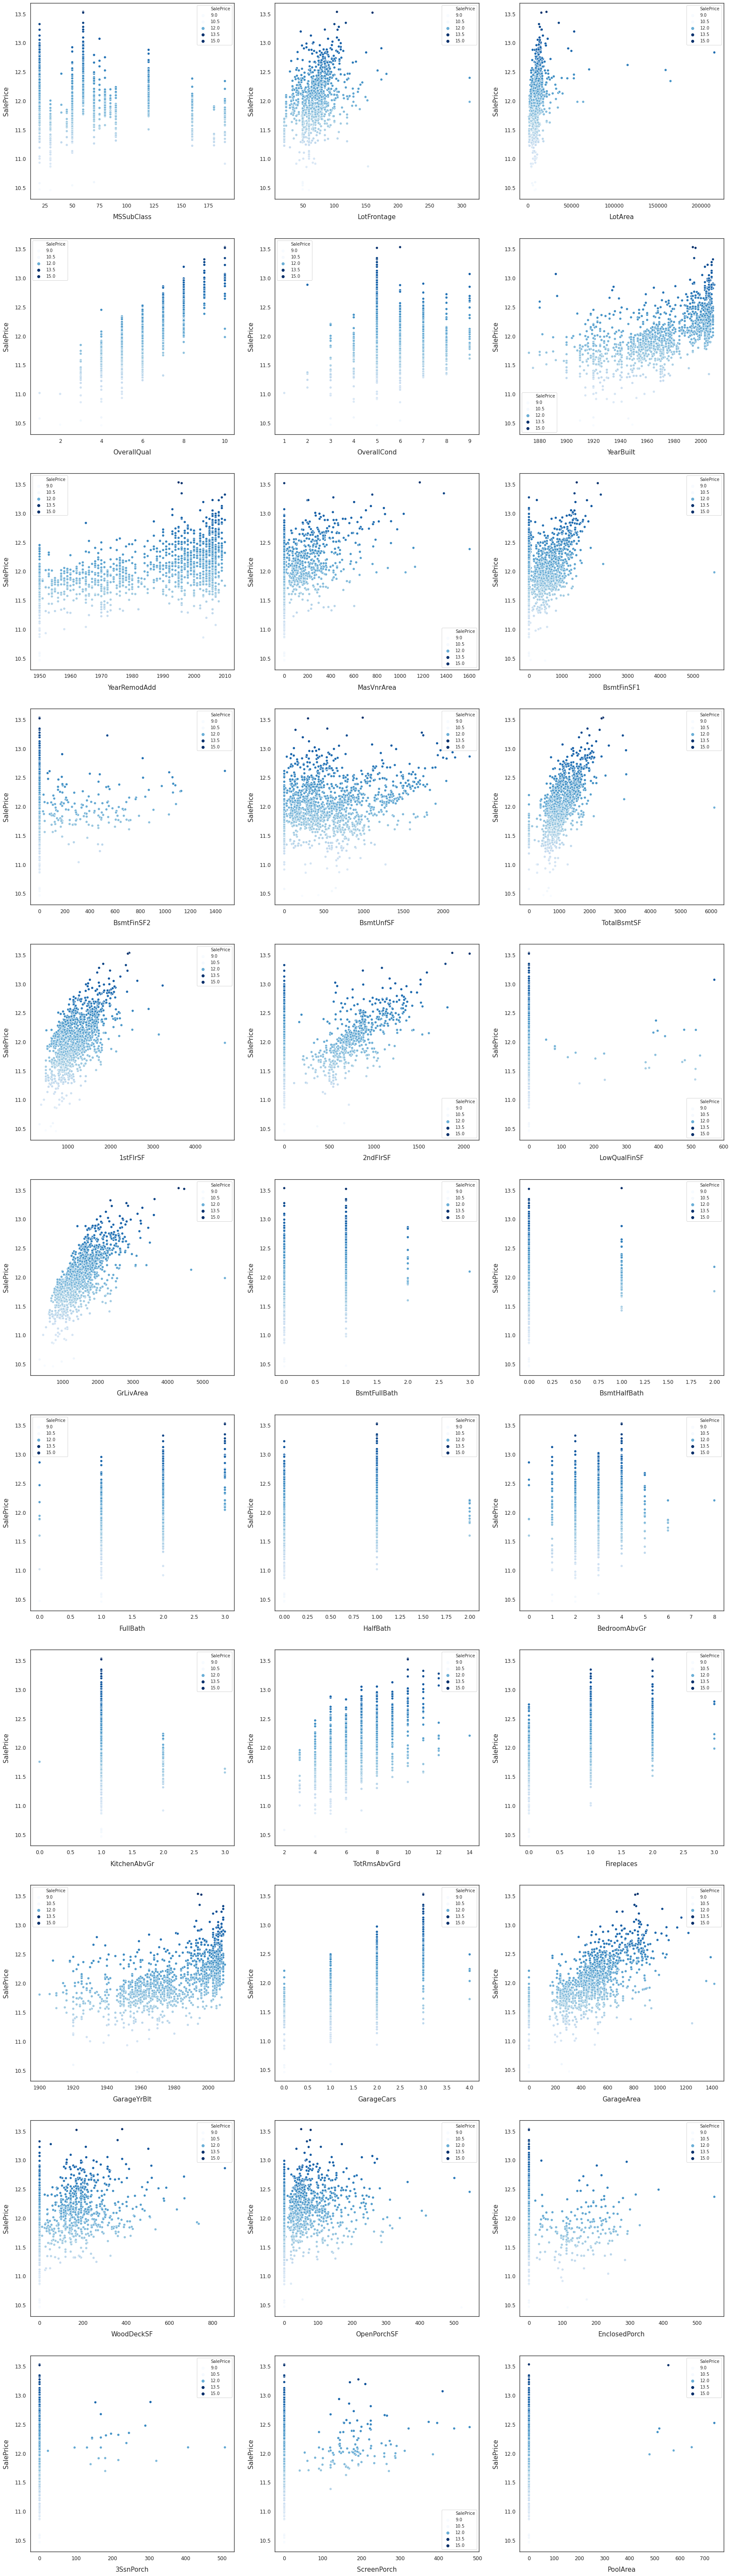

In [93]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in X.columns:
    if X[i].dtype in numeric_dtypes:
        numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 150))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(X[numeric]), 1):
    if(feature=='MiscVal'):
        break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

### Validation and fit

In [0]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [0]:
def mae(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
    print('MAE test = ', mean_absolute_error(y_test, y_test_pred))


# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [0]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [97]:
scores = {}

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['lgb'] = (score.mean(), score.std())

lightgbm: 0.0622 (0.0180)


In [98]:
score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['xgb'] = (score.mean(), score.std())

[18:42:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [99]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['svr'] = (score.mean(), score.std())

SVR: 0.0108 (0.0033)


In [100]:
score = cv_rmse(rf)
print("rf: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['rf'] = (score.mean(), score.std())

rf: 0.0158 (0.0149)


In [101]:
score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['gbr'] = (score.mean(), score.std())

gbr: 0.0780 (0.0218)


#### FIT MODELS

In [102]:
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(train_labels))

stack_gen
[18:56:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:02:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:03:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [103]:
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, train_labels)

lightgbm


In [104]:
print('xgboost')
xgb_model_full_data = xgboost.fit(X, train_labels)

xgboost
[19:04:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [105]:
print('Svr')
svr_model_full_data = svr.fit(X, train_labels)

Svr


In [106]:
print('RandomForest')
rf_model_full_data = rf.fit(X, train_labels)

RandomForest


In [107]:
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, train_labels)

GradientBoosting


In [0]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

In [109]:
# Get final precitions from the blended model
blended_score = rmsle(train_labels, blended_predictions(X))
scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
1.203780309933585


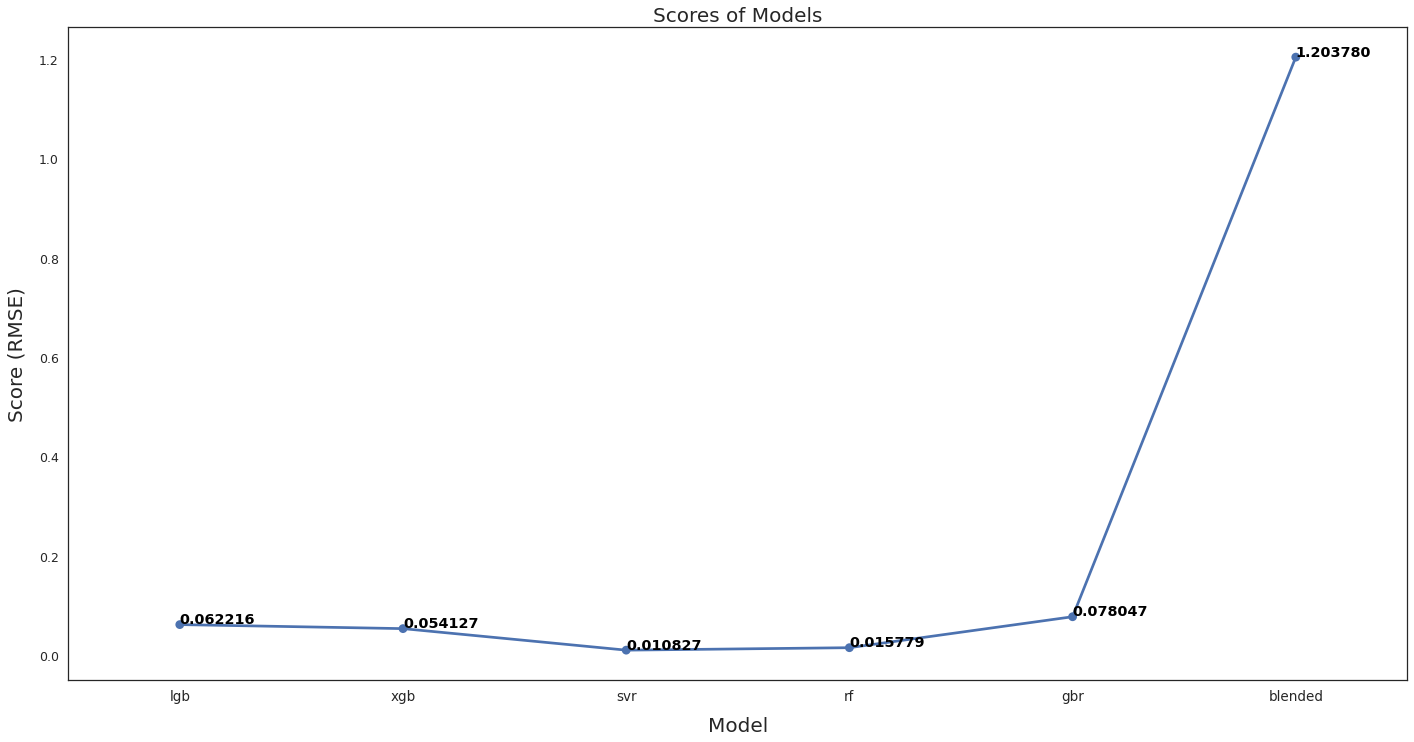

In [110]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score, _ in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

In [111]:
break;
iffor

SyntaxError: ignored

## Normality

In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['GrLivArea'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["GrLivArea"])
plt.title("GrLivArea Distribution after log transformation")
plt.xlabel("GrLivArea Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

In [0]:
# Log transformation
train['GrLivArea'] = np.log1p(train['GrLivArea'])

In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['GrLivArea'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["GrLivArea"])
plt.title("GrLivArea Distribution after log transformation")
plt.xlabel("GrLivArea Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['TotalBsmtSF'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["TotalBsmtSF"])
plt.title("TotalBsmtSF Distribution after log transformation")
plt.xlabel("TotalBsmtSF Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

<blockquote>
  <p>Aquí una transformación log(1+x) no es viable por las significativas observaciones con 0 (houses without basement).</p>
</blockquote>

In [0]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [0]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(train["TotalBsmtSF"])
plt.title("TotalBsmtSF Distribution after log transformation")
plt.xlabel("TotalBsmtSF Variable, USD")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

print('\nMu:', Mu, 'Sigma:', Sigma)

### OHE

In [0]:
#convert categorical variable into dummy
train = pd.get_dummies(train)

## UseFull Shit

In [0]:
# chunks
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

numerical_features.remove('SalePrice')
data = pd.concat([train['SalePrice'], train[numerical_features]], axis=1)
for lst in chunks(numerical_features, 5):
    sns.pairplot(data, y_vars=['SalePrice'], x_vars=lst)